# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [1]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

### Step 2: Read in your data set

In [3]:
# read in data from source
df = pd.read_csv("/Users/RyanReiger/GA_Stuff/sf-dat-21-master/unit-projects/dataset/admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Questions
#### Question 1. How many observations are in our dataset?


In [5]:
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer:

#### Question 2. Create a summary table.

In [6]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Different Units

#### Question 4. Drop data points with missing data.


In [19]:
#Lines with missing data
df[(df.gre.isnull()) | (df.gpa.isnull()) | df.prestige.isnull()]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2
212,0,NaN,2.87,2
236,1,660,NaN,NaN


In [11]:

df.dropna()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


#### Question 5. Confirm that you dropped the correct data.  How can you tell?

Answer: the count at the begining at the bottom of the row

#### Question 6. Create box plots for GRE and GPA.

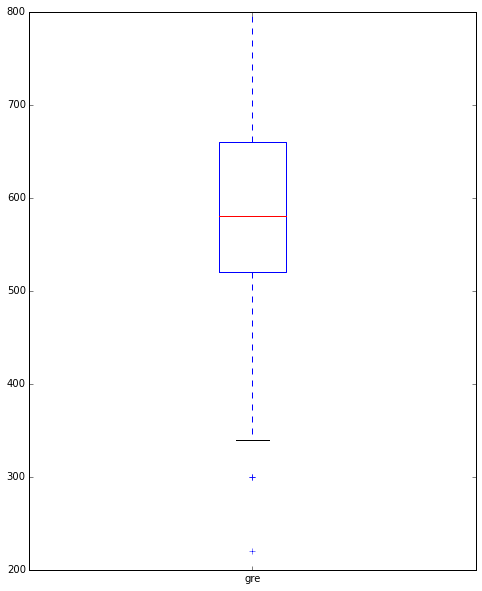

In [34]:
df.gre.plot(kind = 'box', figsize = (8, 10))

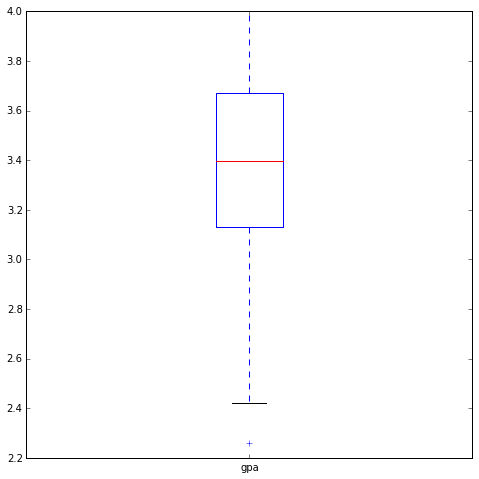

In [33]:
df.gpa.plot(kind = 'box', figsize = (8, 8))

#### Question 7. What do this plots show?

Answer:Averages, outliers, quartiles

#### Question 8. Describe each distribution.

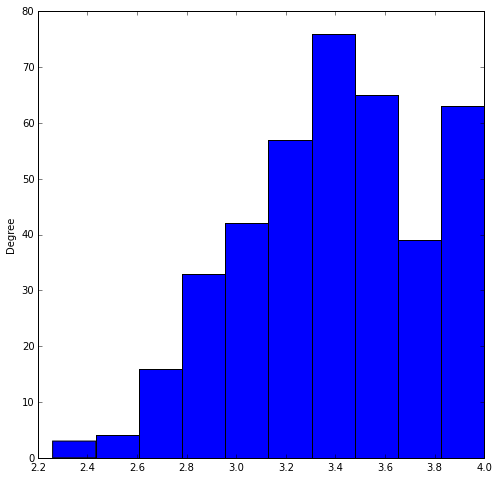

In [37]:
df.gpa.plot(kind = 'hist', figsize = (8, 8))

GPA: A lot of smart people apply to UCLA (large distro at the top of the scale)

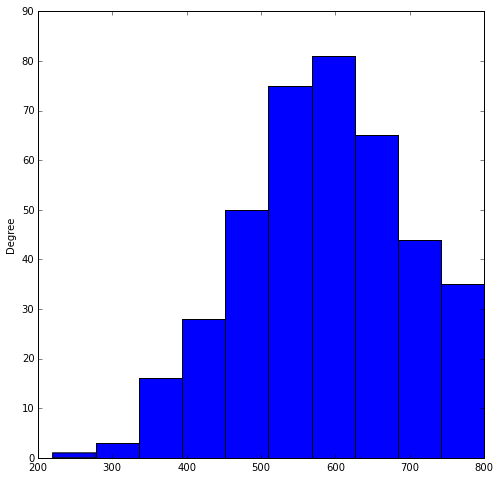

In [38]:
df.gre.plot(kind = 'hist', figsize = (8, 8))

GRE: I would consider this a more normal distroalthough skewed towards the max

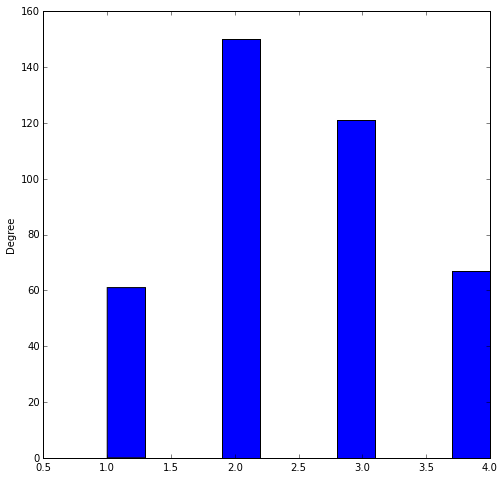

In [40]:
df.prestige.plot(kind = 'hist', figsize = (8, 8))

Answer:I would consider this a pretty normal distro. Maybe skewed a little right

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: GRE, Prestige are normal distros GPA is skewed towards 4.0 

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer: No there are no outliers

#### Question 11. Which of our variables are potentially colinear?

In [41]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: GRE has the highest correlation with acceptance, GPA and GRE have a slight correlation

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer: I would asume there is a possible  corrlation between prestiege of undergrad to acceptance. Top undergrad programs are considered more challenging making it tougher to achieve a high GPA. On the other hand a tougher undergrad program can better prepare you for the GRE exame which has the highest correlation.

#### Question 14. What is your hypothesis?

Answer: Because there is an almost equal correlation between GPA and GRE and acceptance, I would assume that they offset each other and that there is no possitive correlation with acceptance 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

#### 2. Bonus: Log transform the skewed data.

#### 3. Advanced: Impute missing data.